In [3]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

In [18]:
ghz = QuantumCircuit(5, 5)
ghz.h(0)
for idx in range(1,5):
    ghz.cx(0,idx)
ghz.barrier(range(5))
ghz.measure(range(5), range(5))
qc_internal=ghz.decompose()
qc_internal.draw()


In [22]:
print(ghz.num_unitary_factors())

1


In [11]:
import inspect
inspect.signature(transpile)

<Signature (circuits, backend=None, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, callback=None, output_name=None)>

In [12]:
provider = IBMQ.get_provider(group='open')
provider.backends(simulator=False)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
backend = provider.get_backend('ibmq_essex')
backend.configuration().basis_gates# native gates

['u1', 'u2', 'u3', 'cx', 'id']

In [19]:
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cu1(np.pi/4, 0, 1)# controled u gate
qc.h(0)
qc.measure([0], [0])
qc.draw()

In [20]:
qc_basis = qc.decompose()
qc_basis.draw()

In [21]:
print(qc.depth(), ',', qc_basis.depth())# no of parallel operations

4 , 7


# Trivial layout: Map virtual qubits to the same numbered physical qubit on the device, i.e. [0,1,2,3,4] -> [0,1,2,3,4] (default in optimization_level=0).

# Dense layout: Find the sub-graph of the device with same number of qubits as the circuit with the greatest connectivity (default in optimization_level=1).

# Noise adaptive layout: Uses the noise properties of the device, in concert with the circuit properties, to generate the layout with the best noise properties (default in optimization_level=2 and optimization_level=3).

#circuit with large depth will be appreciably affected by noise and gate errors.

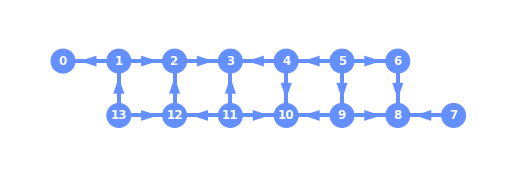

In [23]:
# Qbit maping
backend = provider.get_backend('ibmq_16_melbourne')
plot_gate_map(backend, plot_directed=True)

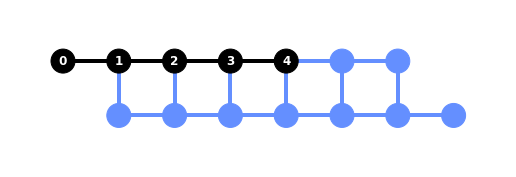

In [24]:
backend= provider.get_backend('ibmq_16_melbourne')
new_circ=transpile(ghz,backend=backend,optimization_level=0)
plot_circuit_layout(new_circ,backend)

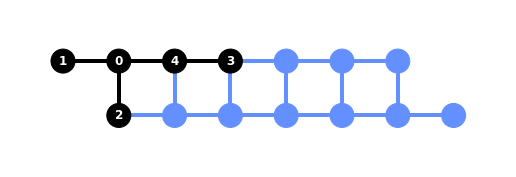

In [25]:
backend= provider.get_backend('ibmq_16_melbourne')
new_circ=transpile(ghz,backend=backend,optimization_level=3)
plot_circuit_layout(new_circ,backend)

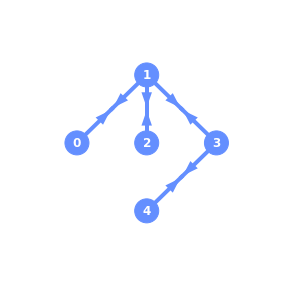

In [45]:
backend = provider.get_backend('ibmq_essex')
plot_gate_map(backend, plot_directed=True)

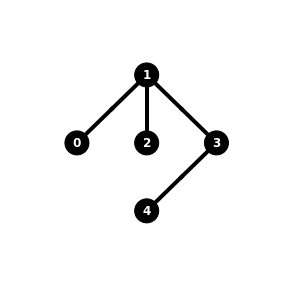

In [32]:
backend = provider.get_backend('ibmq_essex')
new_circ=transpile(ghz,backend=backend,optimization_level=0)
plot_circuit_layout(new_circ,backend)

In [33]:
job1 = execute(new_circ, backend)
job_monitor(job1)

Job Status: job has successfully run


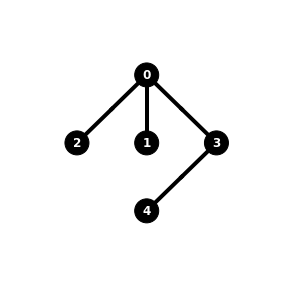

In [34]:
backend= provider.get_backend('ibmq_essex')
new_circ=transpile(ghz,backend=backend,optimization_level=3)
plot_circuit_layout(new_circ,backend)

In [35]:
job2 = execute(new_circ, backend)
job_monitor(job2)

Job Status: job has successfully run


In [40]:
#plot_histogram([job1,job2],legend=legend)

Depth: 13


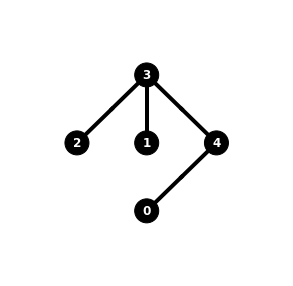

In [41]:
good_ghz = transpile(ghz, backend, initial_layout=[4,2,0,1,3])
print('Depth:', good_ghz.depth())
plot_circuit_layout(good_ghz, backend)


In [42]:
job3 = execute(good_ghz, backend)
job_monitor(job3)

Job Status: job has successfully run


In [43]:
counts1 = job1.result().get_counts()
counts2 = job2.result().get_counts()
counts3 = job3.result().get_counts()

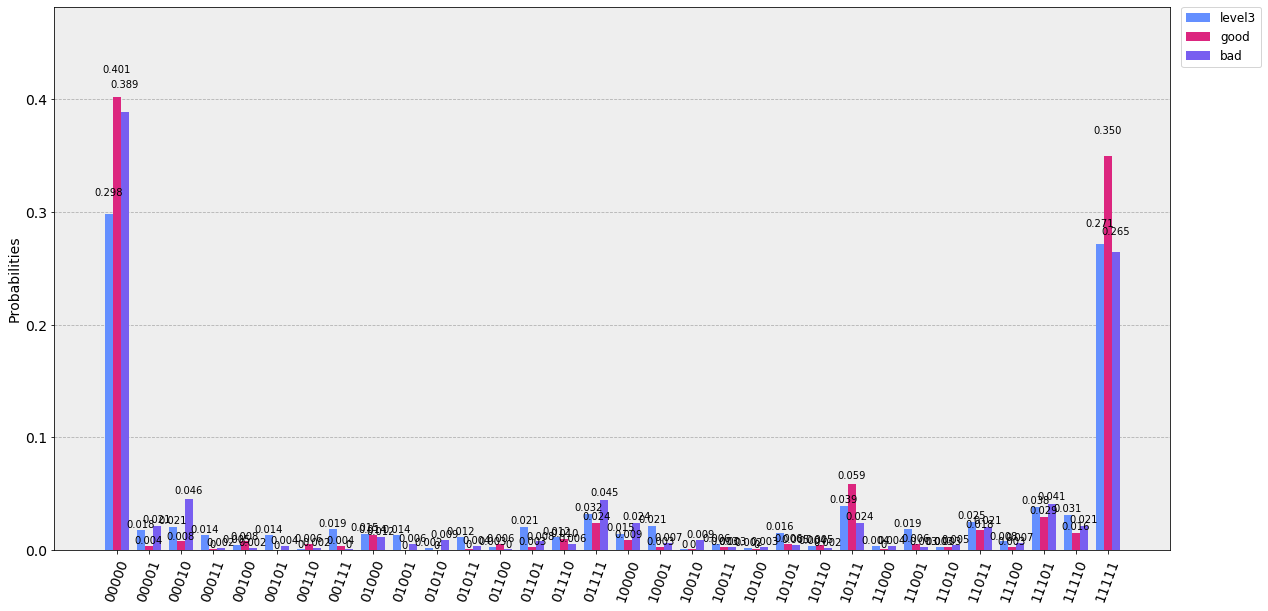

In [48]:
plot_histogram([counts1, counts2, counts3],
               figsize=(20,10),
               legend=['level3', 'good', 'bad'])